In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("gurgaon_properties_cleaned_v2.csv").drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
0,flat,experion the heartsong,sector 108,3.00,18392.0,1631.0,Super Built up area 2779(258.18 sq.m.)Built Up...,4,5,3+,...,2204.25,1631.07,0,1,0,0,0,1,149,58
1,flat,tulip violet,sector 69,1.37,8675.0,1579.0,Super Built up area 1578(146.6 sq.m.)Carpet ar...,3,3,1,...,NaN,1538.00,0,0,0,1,0,0,95,61
2,flat,shree vardhman victoria,sector 70,1.62,13953.0,1161.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,3,3,...,NaN,1161.00,0,1,0,0,0,0,96,36
3,flat,sare green parc phase 3,sector 92,0.95,4856.0,1956.0,Super Built up area 1956(181.72 sq.m.),4,3,3,...,NaN,NaN,0,0,0,0,0,0,67,49
4,flat,mvn athens,sohna road,0.25,5198.0,481.0,Built Up area: 481 (44.69 sq.m.),2,2,0,...,481.00,NaN,0,0,0,0,0,0,37,29


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(3720, 24)

## outlier detection for numerical columns
- price, price_per_sqft, area, bedroom, bathroom, balcony, floor_num etc.
- to know about outliers if the field is normally distributed then we look for mean+-3standard_deviation otherwise when it is not normally distributed then we use boxplot

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\4121014617.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_cr'])


<Axes: xlabel='price_cr', ylabel='Density'>

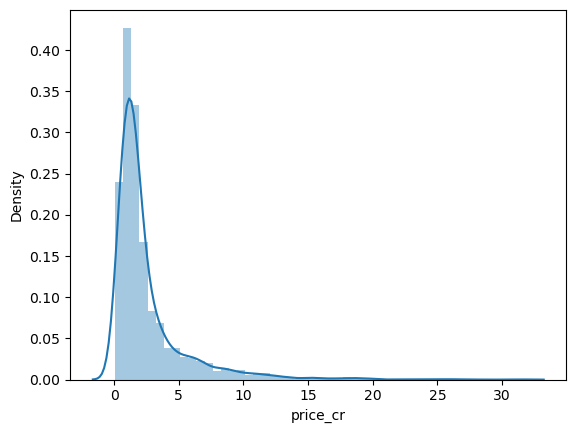

In [7]:
sns.distplot(df['price_cr'])

<Axes: xlabel='price_cr'>

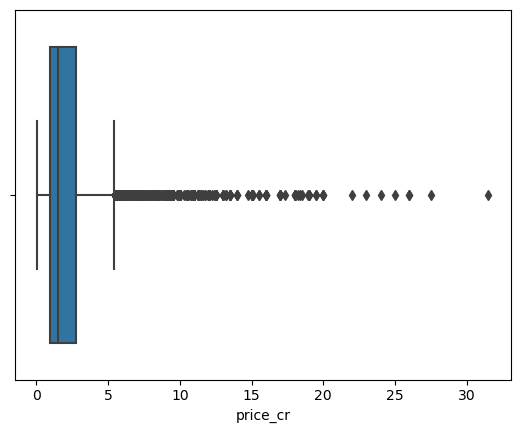

In [8]:
sns.boxplot(x=df['price_cr'])

In [11]:
Q1=df['price_cr'].quantile(0.25)
Q3=df['price_cr'].quantile(0.75)
IQR=Q3-Q1

lower_bond= Q1 - 1.5 * IQR
upper_bond= Q3 + 1.5 * IQR

#identify outliers
outliers=df[(df['price_cr'] < lower_bond) | (df['price_cr'] > upper_bond)]

#info of outliers
num_ouliers=outliers.shape[0]
outliers_price=outliers['price_cr'].describe()

num_ouliers, outliers_price

(431,
 count    431.000000
 mean       9.205893
 std        4.047999
 min        5.460000
 25%        6.450000
 50%        8.000000
 75%       10.555000
 max       31.500000
 Name: price_cr, dtype: float64)

In [12]:
outliers.sort_values('price_cr',ascending=False).head(10)

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
1552,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,...,9000.0,NaN,1,1,1,1,0,1,74,61
1106,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,11286.0,NaN,1,1,0,1,1,2,42,63
1269,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,...,400.0,350.0,1,1,1,1,0,1,72,61
2236,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,...,4545.0,NaN,1,1,0,1,1,2,138,50
966,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,9000.0,NaN,1,1,1,1,0,0,0,81
1845,house,emaar the palm springs,sector 54,24.0,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,...,400.0,NaN,1,1,0,1,0,2,122,57
2367,house,independent,sector 26,23.0,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,9000.0,NaN,1,1,1,1,0,2,145,61
684,house,vipul tatvam villa,sector 48,22.0,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,...,9000.0,NaN,0,1,0,0,0,0,54,37
433,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,...,4500.0,NaN,0,1,0,1,0,1,97,61
1449,house,dlf city plots,sector 26,20.0,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,...,4518.0,NaN,1,1,1,1,0,2,153,50


##### After looking at the outliers we can conclude that there is some data error and some outliers are geniune

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\279779110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['price_per_sqft'])


<Axes: ylabel='Density'>

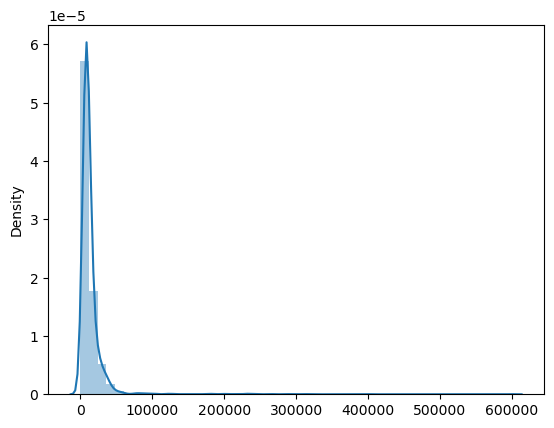

In [13]:
sns.distplot(x=df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

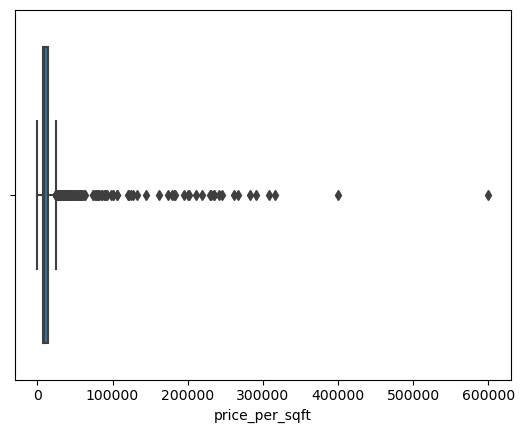

In [14]:
sns.boxplot(x=df['price_per_sqft'])

In [17]:
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
IQR=Q3-Q1

lower_bond= Q1 - 1.5 * IQR
upper_bond= Q3 + 1.5 * IQR

#identify outliers
outliers=df[(df['price_per_sqft'] < lower_bond) | (df['price_per_sqft'] > upper_bond)]

#info of outliers
num_ouliers=outliers.shape[0]
outliers_price=outliers['price_per_sqft'].describe()

num_ouliers, outliers_price

(355,
 count       355.000000
 mean      53358.445070
 std       61393.127125
 min       24510.000000
 25%       28274.500000
 50%       33665.000000
 75%       42208.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [18]:
outliers.to_csv('ouliers_price_per_sqft1.csv',index=False)

In [19]:
outliers['area'] = outliers['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\1621373245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['area'] = outliers['area'].apply(lambda x:x*9 if x<1000 else x)


In [20]:
outliers['price_per_sqft'] = round((outliers['price_cr']*10000000)/outliers['area'])

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\432259278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['price_per_sqft'] = round((outliers['price_cr']*10000000)/outliers['area'])


In [21]:
outliers['price_per_sqft'].describe()

count      355.000000
mean     29256.692958
std      12462.408932
min       2723.000000
25%      25559.000000
50%      29861.000000
75%      35543.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [22]:
df.update(outliers)

<Axes: xlabel='price_per_sqft'>

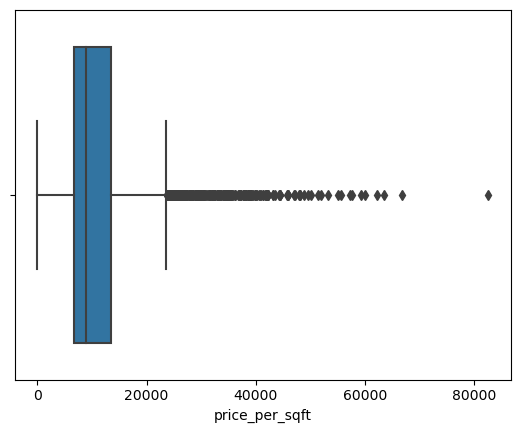

In [23]:
sns.boxplot(x=df['price_per_sqft'])

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

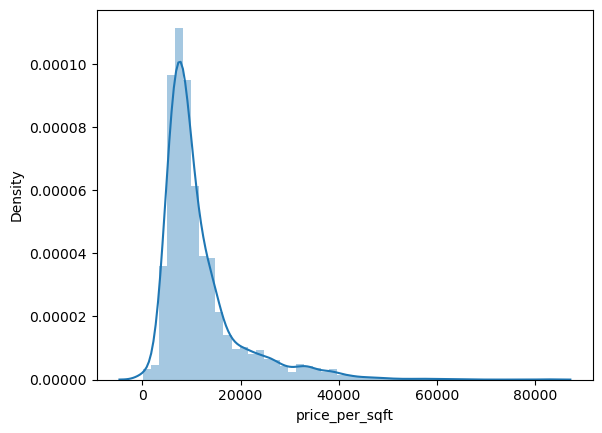

In [24]:
sns.distplot(df['price_per_sqft'])

In [25]:
df[df['price_per_sqft'] > 50000]

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
562,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,...,2430.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,137.0,69.0
667,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,...,250.0,200.0,1.0,1.0,1.0,1.0,0.0,2.0,103.0,62.0
774,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,...,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,153.0,61.0
1117,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,...,2250.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,160.0,57.0
1269,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,...,400.0,350.0,1.0,1.0,1.0,1.0,0.0,1.0,72.0,61.0
1367,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,...,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
1698,house,cloudnine cottages,sohna road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,...,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
1731,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,...,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,99.0,59.0
1845,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,...,400.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,122.0,57.0
2040,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,...,3240.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,75.0,61.0


In [26]:
df=df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

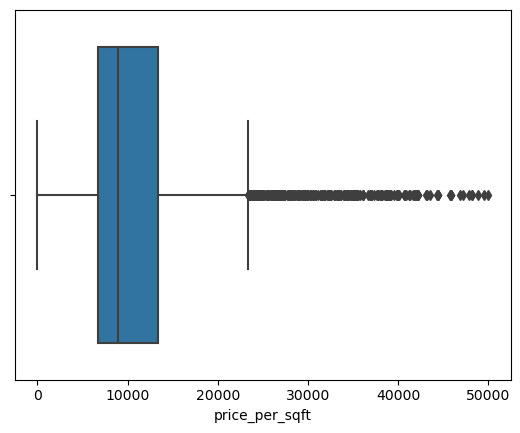

In [27]:
sns.boxplot(x=df['price_per_sqft'])

In [28]:
df[df['price_per_sqft'] > 50000].shape[0]

0

## Area

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

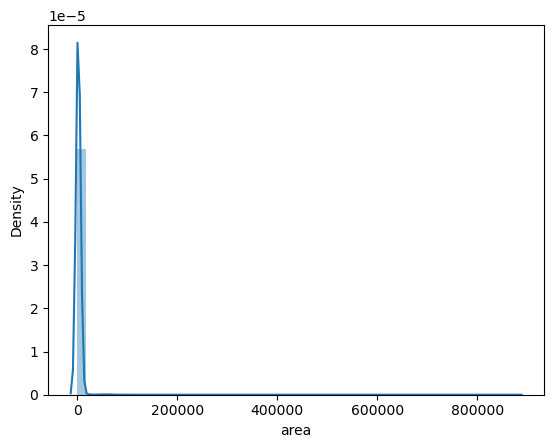

In [29]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

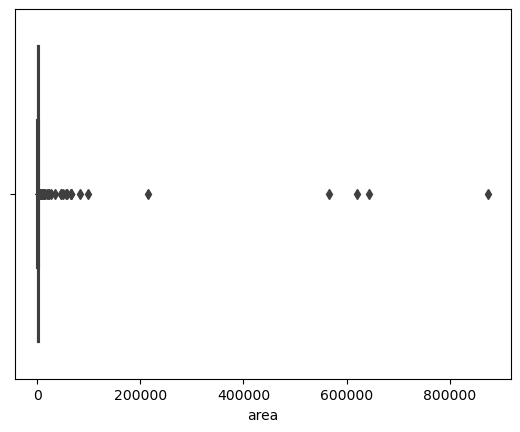

In [30]:
sns.boxplot(x=df['area'])

In [31]:
df['area'].describe()

count      3691.000000
mean       2940.908155
std       23073.424812
min         145.000000
25%        1260.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [32]:
df[df['area']>100000]

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
1464,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,...,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,18.0
1620,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,...,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,0.0,65.0,16.0
2261,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,...,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,44.0,0.0
3347,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,...,2.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0,59.0
3433,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,...,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,40.0


In [33]:
df[df['area']>100000].shape[0]

5

In [34]:
df=df[df['area']< 100000]

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

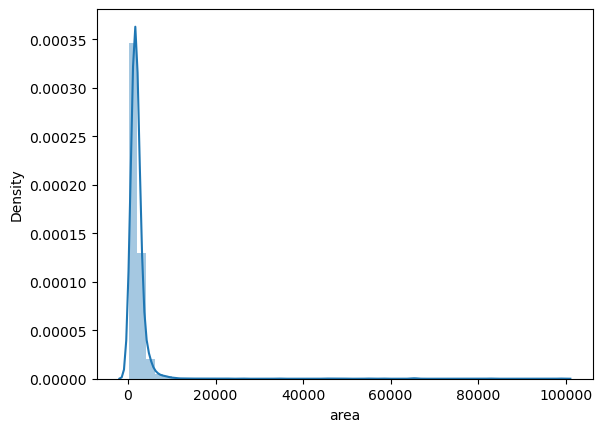

In [35]:
sns.distplot(df['area'])

In [36]:
df[df['area']>10000].sort_values('area',ascending=False)

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
380,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,...,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,2.0,60.0,61.0
3453,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,...,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0,61.0
140,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,...,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,15.0,42.0
2733,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,...,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,51.0,42.0
436,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,...,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0
2682,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,...,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,15.0,49.0
1487,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,...,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,37.0,42.0
1759,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,...,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,0.0,37.0,41.0
1913,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,...,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,2.0,109.0,61.0
451,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,...,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,33.0,8.0


- 3453, 140, 2733, 2682, 1487, 1759, 451, 547, 1522, 3690 all these rows have really low price_per_sqft because of which very large houses and flats prices are low, so we are dropping these rows

In [37]:
df.drop(index=[140, 3453, 2733, 2682, 1487, 1759, 451, 547, 1522,3690], inplace=True)

In [43]:
df.drop(index=380, inplace=True)

In [49]:
df.drop(index=[269,436,633,888,1106,1632,1913,2033,2282,3328], inplace=True)

In [50]:
df[df['area']>10000.0]

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score


In [46]:
#changoing values of area reffrering to area fetched from area_with_type

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

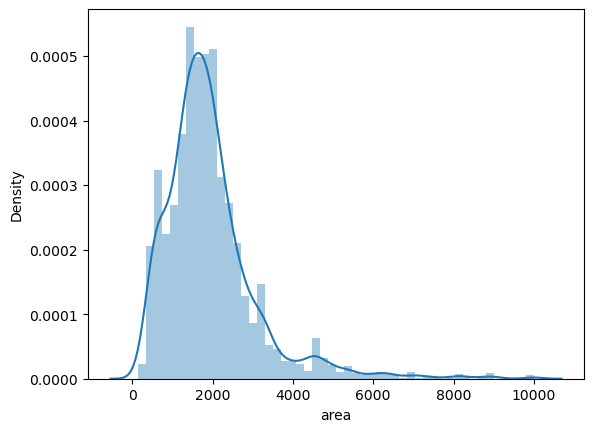

In [51]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

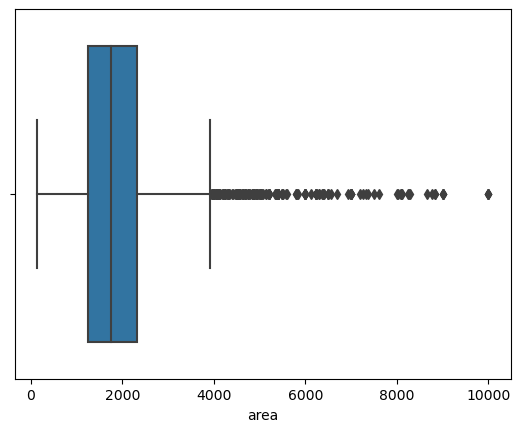

In [52]:
sns.boxplot(x=df['area'])

In [63]:
df['area'].describe()

count     3665.000000
mean      1938.971896
std       1188.060738
min        145.000000
25%       1255.000000
50%       1744.000000
75%       2321.000000
max      10000.000000
Name: area, dtype: float64

## Bedroom

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

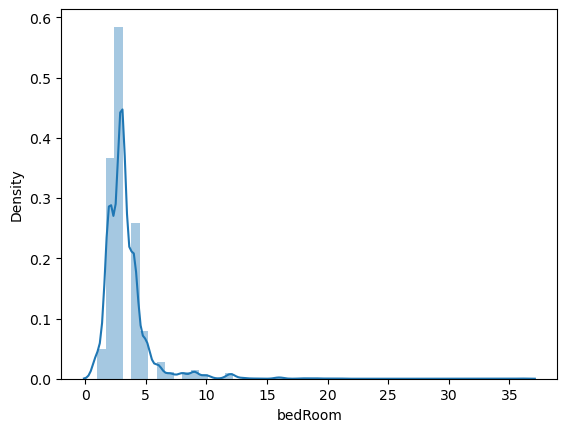

In [57]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

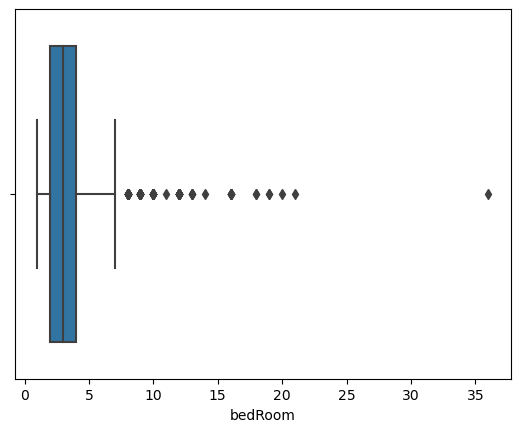

In [58]:
sns.boxplot(x=df['bedRoom'])

In [64]:
df['bedRoom'].describe()

count    3665.000000
mean        3.333697
std         1.894523
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        36.000000
Name: bedRoom, dtype: float64

In [65]:
df[df['bedRoom']>10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
1272,house,independent,sector 13,2.25,6944.0,3240.0,Plot area 360(301.01 sq.m.),36.0,36.0,2,...,3240.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,7.0,61.0
396,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,...,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,49.0,75.0
1202,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,...,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,22.0,63.0
2298,house,independent,sector 17,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,...,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,68.0,60.0
1350,house,independent,sector 17,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,...,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,74.0,60.0
1765,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,...,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,70.0,81.0
3012,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,...,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,57.0,45.0
2511,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,...,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,41.0,63.0
2218,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,...,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0,79.0
1637,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,...,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,49.0,46.0


In [84]:
df=df[df['bedRoom']<10].sort_values('bedRoom',ascending=False)

In [85]:
df[df['bedRoom']>10]

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score


C:\Users\HP\AppData\Local\Temp\ipykernel_13400\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

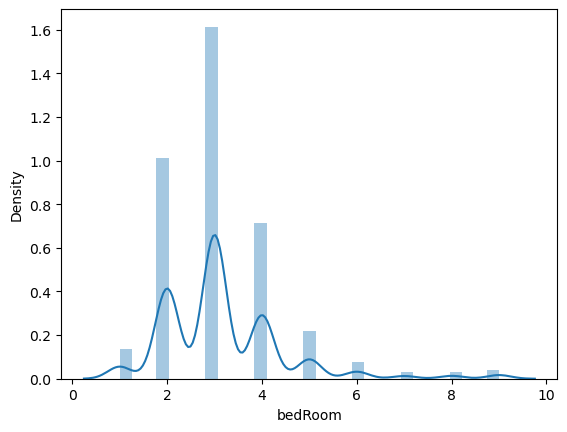

In [87]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

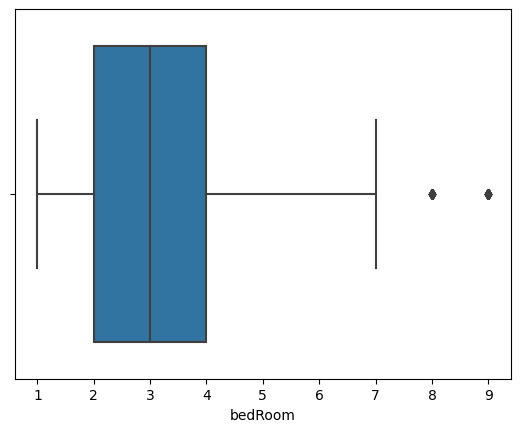

In [88]:
sns.boxplot(x=df['bedRoom'])

## Bathroom

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

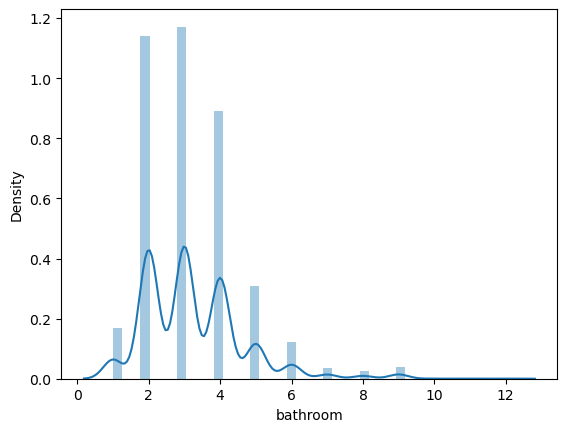

In [86]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

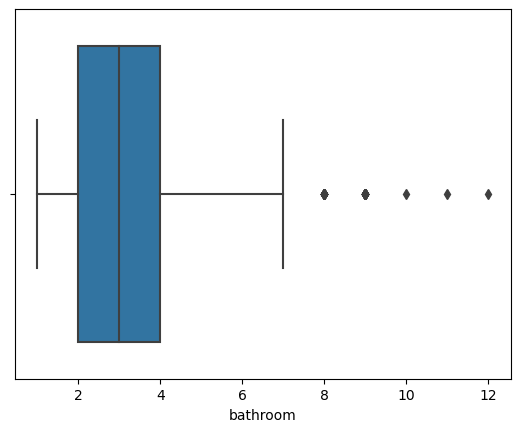

In [89]:
sns.boxplot(x=df['bathroom'])

In [90]:
df['bathroom'].describe()

count    3601.000000
mean        3.237156
std         1.397365
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

In [92]:
df[df['bathroom']>10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
10,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,...,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,146.0,69.0
3724,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,...,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,39.0,0.0


## super_buitup_area

In [95]:
df.shape

(3601, 24)

In [94]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1923.702852
std        765.376373
min         89.000000
25%       1474.250000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

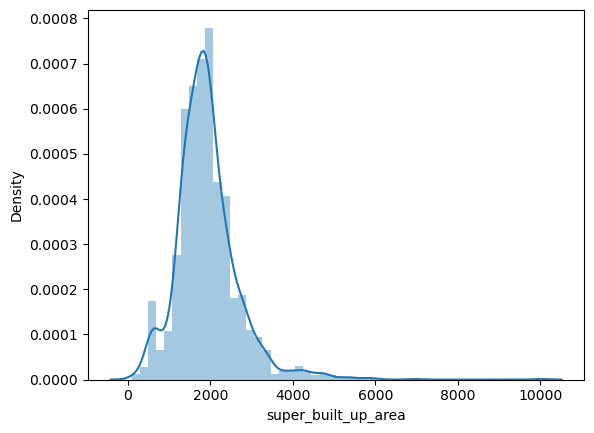

In [96]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

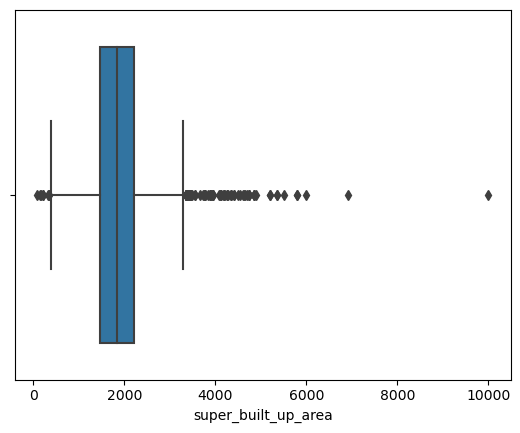

In [97]:
sns.boxplot(x=df['super_built_up_area'])

In [101]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
3226,flat,krrish provence estate,sector 45,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,...,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,49.0,39.0
2923,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,140.0,50.0


## Built_up_area

In [102]:
df['built_up_area'].describe()

count    1622.000000
mean     1940.472213
std      1374.633414
min        14.000000
25%      1130.000000
50%      1650.000000
75%      2396.000000
max      9500.000000
Name: built_up_area, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

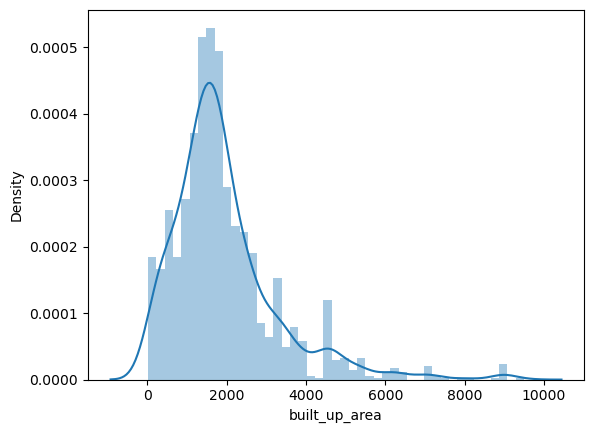

In [103]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

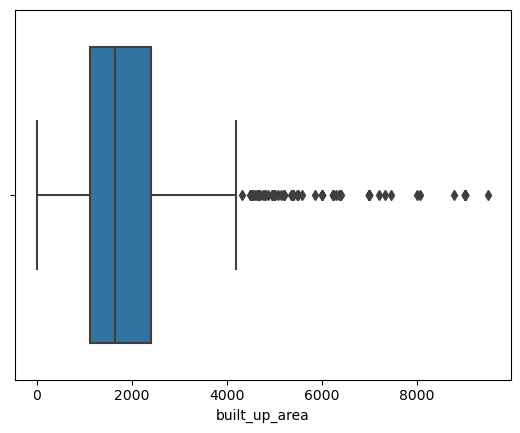

In [104]:
sns.boxplot(x=df['built_up_area'])

In [106]:
df[df['built_up_area']>8000]

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
3617,house,anamika enclave,sector 12,6.00,14492.0,4140.0,Plot area 4140(384.62 sq.m.)Built Up area: 900...,9.0,9.0,3+,...,9000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,9.0,17.0
3552,house,ansal sushant lok plots,sector 43,11.50,17692.0,6500.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000...,7.0,8.0,3+,...,9000.0,6500.0,0.0,1.0,1.0,1.0,0.0,2.0,31.0,45.0
1552,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9.0,3+,...,9000.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,74.0,61.0
2803,house,vipul tatvam villa,sector 48,19.50,22222.0,8775.0,Plot area 975(815.22 sq.m.),5.0,6.0,3,...,8775.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,110.0,37.0
1663,house,independent,sector 25,10.00,37037.0,2700.0,Plot area 2700(250.84 sq.m.)Built Up area: 950...,5.0,5.0,3+,...,9500.0,9000.0,0.0,1.0,0.0,1.0,0.0,1.0,29.0,60.0
1688,house,dlf alameda,sector 73,17.00,35109.0,4842.0,Plot area 4842(449.84 sq.m.)Built Up area: 900...,5.0,8.0,3,...,9000.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,87.0,55.0
3598,house,emaar mgf marbella,sector 66,15.10,18605.0,8116.0,Plot area 754,5.0,5.0,3+,...,8067.8,NaN,1.0,1.0,1.0,1.0,0.0,0.0,120.0,61.0
684,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5.0,6.0,3,...,9000.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,54.0,37.0
966,house,suncity township,sector 54,25.00,31110.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,...,9000.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,81.0
2367,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,...,9000.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,145.0,61.0


## Carpet area

In [108]:
df['carpet_area'].describe()

count     1854.000000
mean      1409.772798
std        921.694891
min         15.000000
25%        845.000000
50%       1296.000000
75%       1760.000000
max      10000.000000
Name: carpet_area, dtype: float64

In [109]:
df[df['carpet_area']==15]

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
1945,house,rk excelo,sector 12,0.6,13333.0,450.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,5.0,3.0,2,...,30.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,61.0


C:\Users\HP\AppData\Local\Temp\ipykernel_13400\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

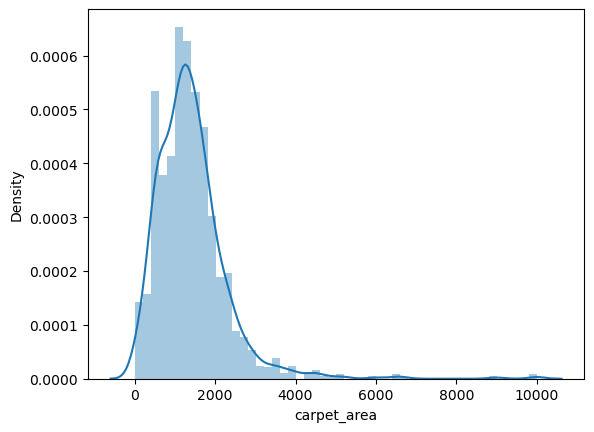

In [110]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

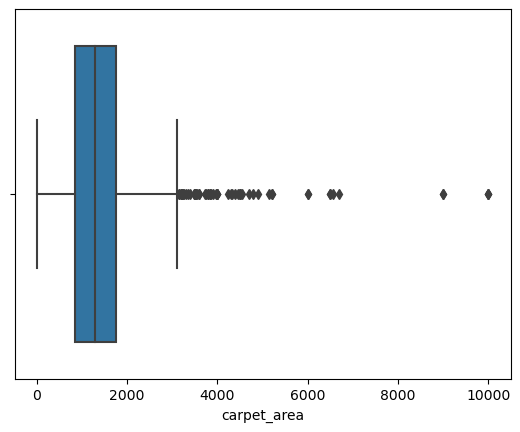

In [111]:
sns.boxplot(x=df['carpet_area'])

In [113]:
df[df['carpet_area']>8000]

,property_type,society,sector,price_cr,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
61,house,independent,sector 26,18.25,18250.0,10000.0,Plot area 550(51.1 sq.m.)Carpet area: 10000 sq...,7.0,9.0,3+,...,NaN,10000.0,1.0,1.0,1.0,1.0,0.0,2.0,77.0,61.0
1663,house,independent,sector 25,10.00,37037.0,2700.0,Plot area 2700(250.84 sq.m.)Built Up area: 950...,5.0,5.0,3+,...,9500.0,9000.0,0.0,1.0,0.0,1.0,0.0,1.0,29.0,60.0
1524,flat,the penthouses at the hibiscus,sector 50,8.00,8888.0,9001.0,Carpet area: 9000 (836.13 sq.m.),4.0,3.0,3,...,NaN,9000.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0,83.0
2213,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.0,Carpet area: 10000 (929.03 sq.m.),4.0,4.0,3,...,NaN,10000.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0,83.0
2821,house,independent,sector 25,8.00,8000.0,10000.0,Carpet area: 10000 (929.03 sq.m.),3.0,9.0,2,...,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Luxury score

In [115]:
df['luxury_score'].describe()

count    3601.000000
mean       71.562066
std        53.251490
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

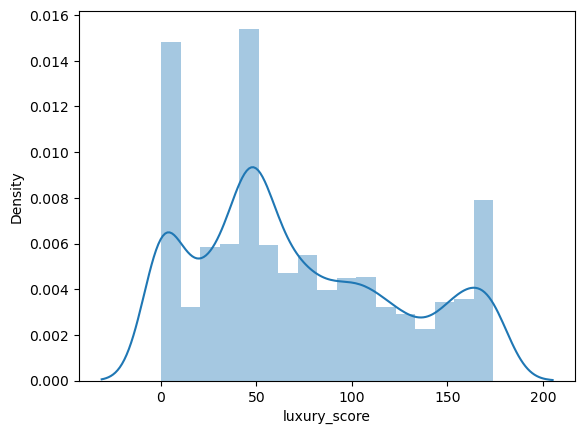

In [116]:
sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

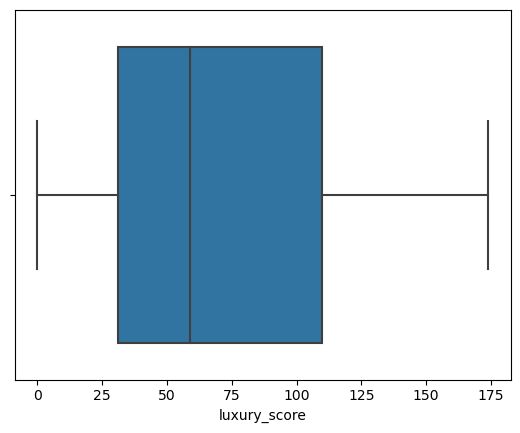

In [117]:
sns.boxplot(x=df['luxury_score'])

## nearbyloc

In [118]:
df['nearbyLoc_score'].describe()

count    3601.000000
mean       50.347126
std        21.288417
min         0.000000
25%        39.000000
50%        55.000000
75%        64.000000
max        98.000000
Name: nearbyLoc_score, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_13400\1697129880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['nearbyLoc_score'])


<Axes: xlabel='nearbyLoc_score', ylabel='Density'>

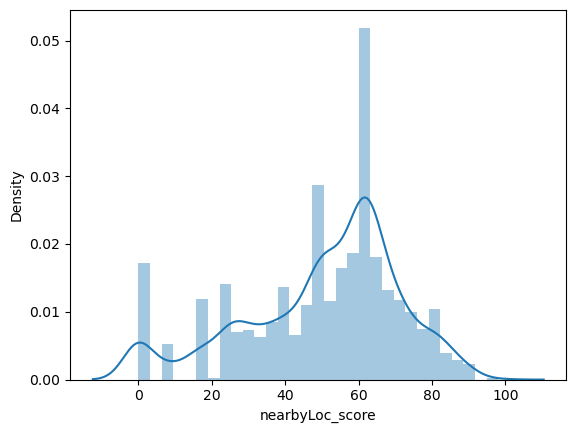

In [119]:
sns.distplot(df['nearbyLoc_score'])

In [120]:
df.to_csv("oulier_detection.csv",index=False)